In [1]:
# 导入warnings模块，用于控制警告信息的显示
import warnings

# 设置warnings模块，忽略所有的警告信息
# 这通常用于避免在执行代码时显示不必要的警告，使输出更清晰
warnings.filterwarnings('ignore')

# 导入pandas库，pandas是一个强大的数据分析和操作库，常用于数据预处理
import pandas

# 导入numpy库，并将其简称为np
# numpy是一个用于科学计算的Python库，提供大量的数学函数操作
import numpy as np

# 使用pandas的read_csv函数读取名为"data/ship_train.csv"的CSV文件
# 这个文件被加载到一个名为ship的pandas DataFrame对象中
# DataFrame是pandas中用于存储表格数据的主要数据结构
ship = pandas.read_csv("data/ship_train.csv")

# 打印ship DataFrame的描述性统计信息
# describe()函数提供了数据的概览，包括计数、平均值、标准差、最小值、四分位数和最大值
# 这有助于快速了解数据的分布情况
print(ship.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [2]:
print(ship.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# 使用pandas库中的fillna方法填充DataFrame中'Age'列的缺失值
# fillna方法用于替换DataFrame中的缺失值（NaN）
# 这里，我们使用ship["Age"].median()来计算'Age'列的中位数
# 然后将这个中位数用来填充'Age'列中的所有缺失值
# 中位数作为填充值可以减少极端值的影响，是一种常用的缺失值处理方法
ship["Age"] = ship["Age"].fillna(ship["Age"].median())

# 打印更新后的DataFrame 'ship'的描述性统计信息
# describe()方法提供了DataFrame中数值型列的统计摘要
# 包括计数、平均值、标准差、最小值、25%分位数、50%分位数（中位数）、75%分位数和最大值
# 这有助于快速了解填充缺失值后数据的分布情况
print(ship.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [4]:
# 将字符用数值代表
# 这一步骤是为了将分类数据（categorical data）转换为数值数据（numerical data）
# 因为大多数机器学习算法不能直接处理字符串类型的分类数据

# sex是字符串，无法进行计算，将它转换为数字，用0代表man，用1代表female
# 首先打印出'Sex'列中所有不同的值（即唯一值）
# unique()函数返回Series中的唯一值，这有助于我们了解数据中的分类情况
print(ship["Sex"].unique())

# 将所有的male替换为数字0
# loc是pandas中的一个函数，用于基于标签的索引/赋值
# 这里使用loc选择'Sex'列中值为'male'的所有行，并将对应的'Sex'值替换为0
ship.loc[ship["Sex"] == "male", "Sex"] = 0

# 将所有的female替换为数字1
# 同样使用loc函数，选择'Sex'列中值为'female'的所有行，并将对应的'Sex'值替换为1
# 这样，'Sex'列就从字符串类型的分类数据转换为了数值型的0和1
ship.loc[ship["Sex"] == "female", "Sex"] = 1

['male' 'female']


In [5]:
# 打印'Embarked'列中所有不同的值
# Embarked列代表乘客登船的港口，其值可能是'S'、'C'或'Q'，分别代表南安普顿（Southampton）、瑟堡（Cherbourg）和皇后镇（Queenstown）
# unique()函数返回Series中的唯一值，这有助于了解数据中包含的港口类别
print(ship["Embarked"].unique())

# 登船的地点也是字符串，需要转换为数字，并填充缺失值
# 在机器学习中，通常需要将分类变量转换为数值型，以便算法可以处理
# 首先，使用fillna方法填充'Embarked'列中的缺失值
# 这里将缺失值填充为'S'，假设'S'是数据集中的一个有效港口代码
ship["Embarked"] = ship["Embarked"].fillna('S')

# loc通过索引获取数据
# loc是pandas中的一个函数，用于基于标签的索引/赋值
# 接下来，使用loc函数将'Embarked'列中的港口代码转换为数值型
# 这里将'S'、'C'和'Q'分别映射为0、1和2

# 将'Embarked'列中所有值为'S'的行的'Embarked'列替换为0
ship.loc[ship["Embarked"] == "S", "Embarked"] = 0

# 将'Embarked'列中所有值为'C'的行的'Embarked'列替换为1
ship.loc[ship["Embarked"] == "C", "Embarked"] = 1

# 将'Embarked'列中所有值为'Q'的行的'Embarked'列替换为2
ship.loc[ship["Embarked"] == "Q", "Embarked"] = 2

['S' 'C' 'Q' nan]


In [6]:
# 机器学习算法（线性回归）
# 线性回归是一种监督学习算法，用于预测连续的输出值
# 它尝试找到特征和目标变量之间的线性关系，并用该关系来预测新数据的目标值

# 导入线性回归库
# 使用sklearn的LinearRegression类，我们可以创建一个线性回归模型
# 这个模型将用于拟合数据并预测连续的目标变量
from sklearn.linear_model import LinearRegression

# 导入交叉验证库
# 交叉验证是一种模型评估方法，用于评估模型的泛化能力
# 它通过将数据集分成多个部分，在不同的子集上训练和测试模型，来减少评估误差

# KFold是交叉验证的一种实现，它将数据集分割成K个子集
# 在每一轮中，选择其中一个子集作为测试集，其余的作为训练集
# 这样，每个数据点都被用于测试一次，而作为训练数据K-1次
# 这有助于我们更全面地评估模型的性能
from sklearn.model_selection import KFold

In [7]:
# 用来预测目标的列
# 定义predictors列表，包含用于预测的自变量列名
# 这些列将作为特征输入到线性回归模型中
# "Pclass"代表乘客的舱位等级，"Sex"代表性别，"Age"代表年龄
# "SibSp"代表兄弟姐妹/配偶的数量，"Parch"代表父母和孩子的数量
# "Fare"代表票价，"Embarked"代表登船港口
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# 对线性回归类进行实例化
# 创建一个LinearRegression类的实例，命名为alg
# 这个实例将用于拟合数据并进行预测
alg = LinearRegression()

# 为泰坦尼克号数据集生成交叉验证折叠
# 使用KFold类创建一个交叉验证器，它将数据集分割成多个部分
# 每一部分轮流作为测试集，而其他部分作为训练集
# n_splits=3表示数据集将被分成3份，进行3次训练和测试
# random_state=1设置随机数生成器的种子，以确保每次分割的一致性
# shuffle=True表示在分割前对数据进行随机打乱，以避免数据顺序影响结果
kf = KFold(n_splits=3, random_state=1, shuffle=True)

In [8]:
# 初始化一个空列表，用于存储所有测试折叠的预测结果
predictions = []

# 使用KFold对象kf进行交叉验证，遍历每一对训练集和测试集的索引
for train, test in kf.split(ship):
    # 根据训练集索引从ship DataFrame中选取特征列
    # predictors是特征列的列表，.iloc[train,:]根据行索引选择数据
    train_predictors = ship[predictors].iloc[train,:]

    # 根据训练集索引从ship DataFrame中选取目标列"Survived"
    # 目标列是我们想要预测的列，即乘客是否存活
    train_target = ship["Survived"].iloc[train]

    # 使用fit方法训练线性回归模型alg
    # 传入训练特征集train_predictors和目标集train_target
    # 这一步是模型学习特征和目标之间关系的过程
    alg.fit(train_predictors, train_target)

    # 使用训练好的模型alg对测试集进行预测
    # 根据测试集索引从ship DataFrame中选取特征列
    # predict方法返回测试集的预测结果
    test_predictions = alg.predict(ship[predictors].iloc[test,:])

    # 将得到的测试集预测结果添加到predictions列表中
    # 最终，predictions列表将包含每一轮交叉验证的预测结果
    predictions.append(test_predictions)

In [9]:
# 使用numpy的concatenate函数将predictions列表中所有的数组合并成一个数组
# predictions列表包含了通过交叉验证得到的各个测试集的预测结果
# axis=0参数表示沿着第一个轴（行）进行合并，即将所有数组垂直堆叠起来
predictions = np.concatenate(predictions, axis=0)

# 将预测结果映射到二分类结果（0或1）
# 线性回归模型的输出是一个连续值，我们需要将其转换为二分类结果
# 这里使用的阈值是0.5，大于0.5的预测结果被视为1（预测为存活），小于等于0.5的被视为0（预测为未存活）
predictions[predictions > .5] = 1
predictions[predictions <= .5] = 0

# 计算准确率
# 首先，使用条件索引找出预测正确的结果，即预测结果与实际结果（ship["Survived"]）相等的元素
# 然后，计算这些正确预测的数量，并除以总预测数（len(predictions)），得到准确率
accuracy = sum(predictions[predictions == ship["Survived"]]) / len(predictions)

# 打印准确率
# 这个值表示模型预测的准确性，是评估模型性能的一个重要指标
print(accuracy)

0.13468013468013468


In [10]:
# 导入逻辑回归所需的库
# 逻辑回归是一种用于二分类问题的机器学习算法，它预测的是事件发生的概率
from sklearn.linear_model import LogisticRegression

# 导入cross_val_score函数
# cross_val_score用于计算交叉验证的分数，如准确率、召回率等
from sklearn.model_selection import cross_val_score

# 实例化LogisticRegression类，创建一个逻辑回归模型
# random_state参数设置为1，确保每次分割数据时结果相同，增加模型的可复现性
alg = LogisticRegression(random_state=1)

# 计算所有交叉验证折叠的准确率
# cross_val_score函数计算给定模型在交叉验证中的表现
# alg是逻辑回归模型，ship[predictors]是特征数据，ship["Survived"]是目标变量
# cv=3表示使用3折交叉验证，即数据被分为3份，每份轮流作为测试集
scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=3)

# 打印分数的平均值
# 由于每一折交叉验证都会得到一个分数，scores.mean()计算这些分数的平均值
# 这个平均值提供了模型整体性能的一个估计
print(scores.mean())

# 注意事项
# 逻辑回归与线性回归的输出类型不同
# 逻辑回归输出的是概率值，表示某个事件发生的可能性
# 而线性回归输出的是[0,1]区间的数值，表示连续的预测结果
# 通常逻辑回归的输出需要通过阈值（如0.5）转换为二分类结果

0.7957351290684623


In [11]:
# 导入随机森林分类器和梯度提升分类器
# 这两个都是集成学习方法，用于分类任务
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# 定义用于模型训练的特征列
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# 初始化随机森林分类器算法
# 使用默认参数，同时指定一些关键参数以控制模型的行为
# n_estimators参数定义了要生成的决策树的数量，更多的树通常可以提高模型的性能
# min_samples_split定义了在决策树中进行拆分操作所需的最小样本数
# min_samples_leaf定义了决策树中叶节点的最小样本数
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

# 计算所有交叉验证折叠的准确率
# 使用KFold对象进行3折交叉验证，每次拆分数据前都会打乱
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# 使用cross_val_score函数计算随机森林模型在交叉验证中的准确率
# ship[predictors]是特征数据，ship["Survived"]是目标变量
# cv参数设置为kf，使用上面定义的交叉验证方案
scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=kf)

# 打印分数的平均值
# 每一折交叉验证都会给出一个准确率分数，scores.mean()计算这些分数的平均值
# 这个平均准确率提供了模型整体性能的一个估计
print(scores.mean())

0.7957351290684626


In [12]:
# 初始化随机森林分类器算法
# RandomForestClassifier是一种集成学习方法，适用于分类和回归任务
# random_state设置为1，以确保每次运行代码时数据分割的一致性
# n_estimators=50表示使用50棵树构建随机森林，增加树的数量可以提高模型的准确性
# min_samples_split=4表示只有当一个节点的样本数大于或等于4时，才会进行拆分
# min_samples_leaf=2表示只有当叶节点的样本数大于或等于2时，才会保留该叶节点
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

# 创建KFold对象，用于3折交叉验证
# n_splits=3表示将数据集分为3份，每份轮流作为测试集
# random_state=1确保每次分割的数据相同，shuffle=True表示在分割前会随机打乱数据
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# 使用cross_val_score计算随机森林模型在交叉验证中的准确率
# 传入模型alg，特征数据ship[predictors]，目标变量ship["Survived"]，以及交叉验证方案kf
# cross_val_score会返回一个数组，包含每次交叉验证的准确率分数
scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=kf)

# 打印分数的平均值
# scores.mean()计算交叉验证得到的准确率分数的平均值
# 这个平均准确率是模型性能的一个指标，反映了模型在未知数据上的泛化能力
print(scores.mean())

0.8260381593714926


In [13]:
# 生成一个名为"FamilySize"的新列
# 这个列是通过将"SibSp"（兄弟姐妹/配偶的数量）和"Parch"（父母和孩子的数量）相加得到的
# "FamilySize"列表示乘客的家庭大小，即与乘客一起旅行的家庭成员总数
ship["FamilySize"] = ship["SibSp"] + ship["Parch"]

# 使用apply方法生成一个新的列"NameLength"
# apply方法允许我们对DataFrame中的列应用一个函数
# 这里使用了一个lambda函数，它是一个匿名函数，用于返回每个姓名的长度
# len(x)计算每个乘客姓名字符串的长度
# 这样，"NameLength"列将包含每个乘客姓名的长度
ship["NameLength"] = ship["Name"].apply(lambda x: len(x))

In [14]:
import re
# 导入正则表达式模块re，用于文本的搜索和匹配

# 定义一个函数get_title，用于从乘客姓名中提取标题
def get_title(name):
    # 使用正则表达式re.search来查找符合模式的字符串
    # 模式' ([A-Za-z]+)\.'用于匹配由一个空格开头，后面跟着一个或多个大小写字母，并且以句号结束的字符串
    # 这通常对应于乘客姓名中的头衔部分
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # 如果正则表达式搜索找到了匹配项，返回匹配的字符串（即标题）
    # group(1)方法返回第一个括号中匹配的字符串
    if title_search:
        return title_search.group(1)
    
    # 如果没有找到标题，返回空字符串
    return ""

# 使用apply方法和get_title函数从"Name"列中提取所有乘客的标题
titles = ship["Name"].apply(get_title)

# 打印每个标题出现的频率
# 使用pandas的value_counts函数统计各个标题的数量
print(pandas.value_counts(titles))

# 定义一个字典title_mapping，用于将标题映射为整数
# 某些罕见的标题被映射为常见标题的相同数字代码
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, 
    "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, 
    "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, 
    "Sir": 9, "Capt": 7, "Ms": 2
}

# 遍历title_mapping字典中的所有项
for k, v in title_mapping.items():
    # 将titles列中匹配特定标题的值替换为对应的整数代码
    titles[titles == k] = v

# 在映射所有标题之后，再次打印标题的频率
# 这验证了映射是否成功应用
print(pandas.value_counts(titles))

# 将处理后的标题添加到原始的ship DataFrame中，作为新的列"Title"
ship["Title"] = titles

Name
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
Name
1     517
2     183
3     125
4      40
5       7
6       6
7       5
8       3
10      3
9       2
Name: count, dtype: int64


In [15]:
import numpy as np
# 导入NumPy库，NumPy是一个用于科学计算的Python库，提供大量的数学函数操作

from sklearn.feature_selection import SelectKBest, f_classif
# 从scikit-learn库中导入SelectKBest类和f_classif函数
# SelectKBest用于选择最佳的特征，f_classif是一个用于评估特征重要性的统计测试

import matplotlib.pyplot as plt
# 导入matplotlib的pyplot模块，用于绘图

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
# 定义一个列表predictors，包含用于特征选择的特征列名

# 进行特征选择
# 使用SelectKBest选择得分最高的k个特征
# f_classif是ANOVA F-value，用于分类问题的单变量特征选择
selector = SelectKBest(f_classif, k=5)
# k=5表示选择5个最佳特征

# 用训练数据拟合选择器
# fit方法用于计算各个特征的得分和p值
selector.fit(ship[predictors], ship["Survived"])

# 获取每个特性的原始p值，并将p值转换为分数
# p值是统计测试中的概念，用于测试特征的重要性
# 这里使用-np.log10转换p值，这是一种常见的转换方法，可以强调较小的p值（即更显著的特征）
# np.log10是以10为底的对数函数
scores = -np.log10(selector.pvalues_)

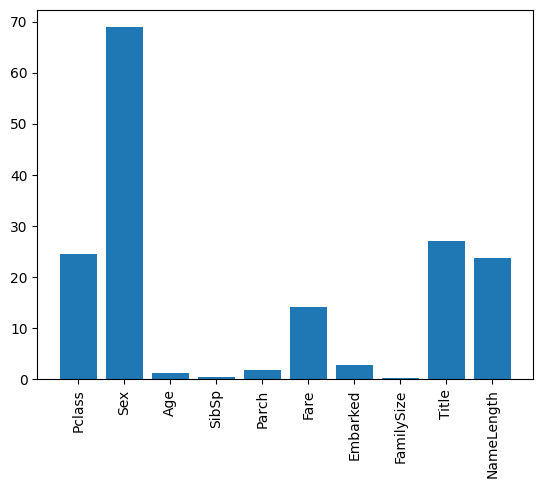

In [16]:
import matplotlib.pyplot as plt
# 导入matplotlib的pyplot模块，这是一个用于绘图的库

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
# 假设predictors列表已经定义，包含所有候选特征的名称

scores = -np.log10(selector.pvalues_)
# 假设scores变量已经计算，包含转换后的p值分数，用于评估特征的重要性

# 画出成绩，看看“Pclass”“Sex”“Title”和“Fare”怎样才是最好的
# 使用bar函数绘制柱状图，显示每个特征的分数
# range(len(predictors))生成一个序列，作为x轴的位置
plt.bar(range(len(predictors)), scores)

# 设置x轴的刻度，使其显示每个特征的名称
# range(len(predictors))生成一个序列，作为x轴的刻度位置
# predictors列表作为x轴的刻度标签
# rotation='vertical'将标签旋转90度，使其垂直显示，便于阅读
plt.xticks(range(len(predictors)), predictors, rotation='vertical')

# 将图表保存到文件
# 'Images/01Main-01.png'是文件的保存路径和名称
# bbox_inches='tight'确保所有的图表内容都被包含在保存的图像中，没有被裁剪掉
plt.savefig('Images/01Main-01.png', bbox_inches='tight')

# 显示图表
plt.show()

In [17]:
# 通过以上特征的重要性分析，选择出4个最重要的特性，重新进行随机森林算法的运算
# 根据之前的特征重要性分析，选择了"Pclass"、"Sex"、"Fare"和"Title"这四个特征
# 这些特征被认为在预测乘客是否存活方面最为重要
predictors = ["Pclass", "Sex", "Fare", "Title"]

# 初始化随机森林分类器算法
# RandomForestClassifier是一个集成学习方法，用于分类任务
# random_state设置为1，以确保每次运行代码时结果的一致性
# n_estimators=50表示使用50棵树构建随机森林
# min_samples_split=8表示只有当一个节点的样本数大于或等于8时，才会进行拆分
# min_samples_leaf=4表示只有当叶节点的样本数大于或等于4时，才会保留该叶节点
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

# 进行交叉验证
# 使用KFold对象进行3折交叉验证，每次拆分数据前都会打乱
kf = KFold(n_splits=3, random_state=1, shuffle=True)

# 使用cross_val_score计算随机森林模型在交叉验证中的准确率
# ship[predictors]是特征数据，ship["Survived"]是目标变量
# cv=kf指定使用KFold对象定义的交叉验证方案
scores = cross_val_score(alg, ship[predictors], ship["Survived"], cv=kf)

# 打印交叉验证的平均准确率
# scores.mean()计算交叉验证得到的准确率分数的平均值
# 这提供了模型在所选特征上的整体性能估计
# 根据注释，目前的结果并无明显提升，这可能是由于特征选择或其他因素
print(scores.mean())

# 注释中提到，本处理是为了练习在随机森林中的特征选择
# 特征选择是数据挖掘中的一个重要步骤，有助于提高模型的性能和解释性

0.819304152637486


In [18]:
from sklearn import ensemble
from sklearn.model_selection import cross_validate
# 导入sklearn库中的ensemble模块，用于创建集成模型
# 导入cross_validate函数，用于进行交叉验证

# 定义我们要集成的算法列表。
# 这里使用了两种不同的分类器：GradientBoostingClassifier和LogisticRegression。
# 每种分类器都通过名称（如 'gbc'）和实例进行配对。
voting_est = [
    ('gbc', GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=5)),
    ('lr', LogisticRegression(random_state=1)),
]

predictors = ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]
# 定义predictors列表，包含用于训练模型的特征列名

# 创建一个软投票分类器，用于集成上面定义的分类器。
# 'soft'投票意味着分类器将使用预测的概率进行平均，而不是使用多数投票。
voting_soft = ensemble.VotingClassifier(estimators=voting_est, voting='soft')

# 执行交叉验证，并返回一个包含多个结果的字典。
# 这里使用kf定义的交叉验证方案（假设kf已经定义为KFold对象）
voting_soft_cv = cross_validate(voting_soft, ship[predictors], ship["Survived"], cv=kf)

# 训练集成模型voting_soft，使用选定的特征和目标变量。
voting_soft.fit(ship[predictors], ship["Survived"])

# 打印软投票分类器在交叉验证中测试集的平均准确率（以百分比形式）。
# {:.2f} %是一个格式化字符串，表示将数字格式化为百分比，保留两位小数。
print("Soft Voting Test w/bin score mean: {:.2f} %".format(voting_soft_cv['test_score'].mean() * 100))

Soft Voting Test w/bin score mean: 83.73 %
